In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import seaborn as sns

In [21]:
tf.__version__

'2.7.0'

In [22]:
!nvidia-smi

Thu Jan 20 22:20:14 2022       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 511.23       Driver Version: 511.23       CUDA Version: 11.6     |
|-------------------------------+----------------------+----------------------+
| GPU  Name            TCC/WDDM | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  NVIDIA GeForce ... WDDM  | 00000000:01:00.0  On |                  N/A |
| N/A   42C    P8     2W /  N/A |    493MiB /  4096MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [23]:
tf.keras.__version__

'2.7.0'

In [24]:
mnist = tf.keras.datasets.mnist

In [25]:
(X_train_full, y_train_full), (X_test_full, y_test_full) = mnist.load_data()

In [26]:
X_train_full.shape # 60 k images of 28*28 size

(60000, 28, 28)

In [27]:
y_train_full.shape

(60000,)

In [28]:
X_test_full.shape

(10000, 28, 28)

In [29]:
type(X_train_full)

numpy.ndarray

In [30]:
img = X_train_full[1]

In [31]:
img.shape

(28, 28)

In [32]:
img

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,  51, 159, 253, 159,  50,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,  48, 238, 252, 252, 252, 237,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  

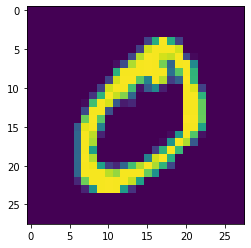

In [33]:
plt.imshow(img)

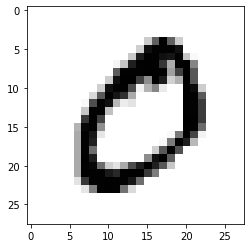

In [34]:
plt.imshow(img, cmap="binary")

<AxesSubplot:>

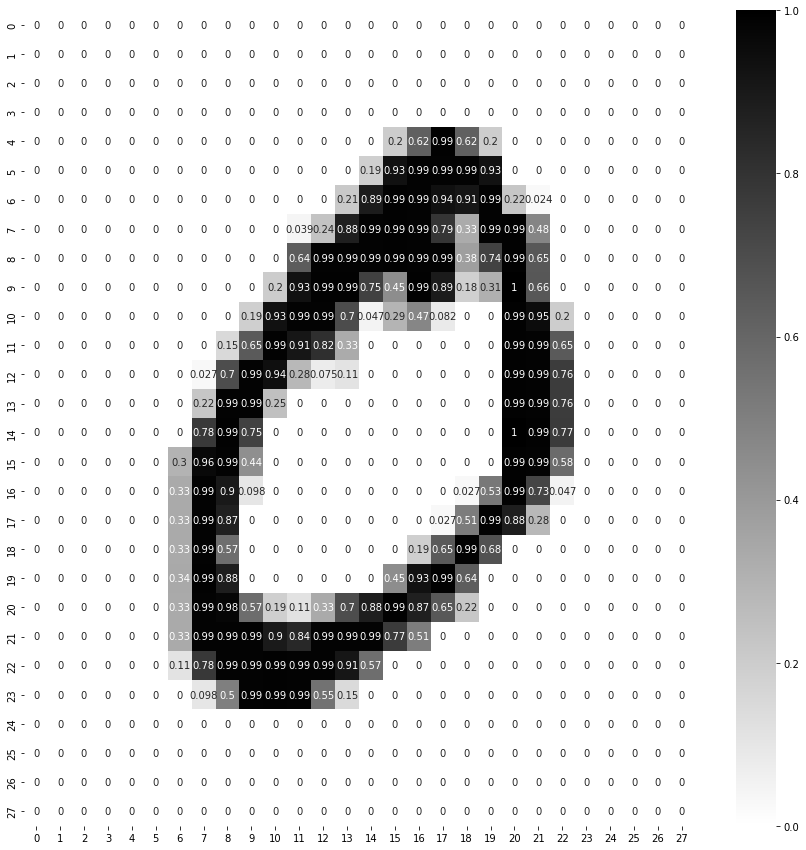

In [35]:
plt.figure(figsize=(15,15))
sns.heatmap(img/255, cmap="binary", annot=True)

In [36]:
X_valid, X_train = X_train_full[:5000] /255 , X_train_full[5000:] /255
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]

In [37]:
X_test_full = X_test_full / 255

In [38]:
# make Layer
CLASS =10
LAYER = [tf.keras.layers.Flatten(input_shape=(28,28), name='inputLayer'),
         tf.keras.layers.Dense(units=300, activation='relu', name='hiddenLayer1'),
         tf.keras.layers.Dense(units=100, activation='relu', name='hiddenLayer2'),
         tf.keras.layers.Dense(units=CLASS, activation='softmax', name ='OutputLayer'),         
]

In [39]:
model_cf = tf.keras.models.Sequential(layers=LAYER)

In [40]:
model_cf.layers

In [41]:
model_cf.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 inputLayer (Flatten)        (None, 784)               0         
                                                                 
 hiddenLayer1 (Dense)        (None, 300)               235500    
                                                                 
 hiddenLayer2 (Dense)        (None, 100)               30100     
                                                                 
 OutputLayer (Dense)         (None, 10)                1010      
                                                                 
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________


In [42]:
# paramsfor_l1, here biase are 300
784 *300 + 300

235500

In [43]:
# parmas for l2, here biase are 100
300 * 100 + 100

30100

In [44]:
# params for opt layer, biase=10
100 * 10 + 10

1010

In [45]:
# total param to be trained 
235500+30100+1010

266610

In [46]:
model_cf.layers

In [47]:
weights, biases = model_cf.layers[1].get_weights()

In [48]:
weights.shape

(784, 300)

In [49]:
biases.shape

(300,)

In [50]:
weights

array([[-0.04661572,  0.03214459, -0.03686077, ..., -0.0134659 ,
        -0.06653228,  0.01020376],
       [ 0.02592023, -0.03583479,  0.05701162, ...,  0.06339179,
         0.01269475, -0.01861671],
       [ 0.00076796, -0.01982232,  0.0491972 , ...,  0.05848129,
         0.02199274,  0.01236158],
       ...,
       [ 0.00436678,  0.03557906,  0.02232102, ...,  0.04264196,
        -0.07412144,  0.03499801],
       [-0.05370607,  0.01723187,  0.05880572, ..., -0.05525026,
         0.07243927, -0.06362928],
       [ 0.02667397, -0.01243876, -0.03297297, ..., -0.04494875,
         0.06749354,  0.01240321]], dtype=float32)

In [51]:
biases

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0.

In [52]:
LOSS_FUNCTION = "sparse_categorical_crossentropy"
OPTIMIZER = "SGD"
METRICS = ["accuracy"]

In [53]:
model_cf.compile(loss=LOSS_FUNCTION, optimizer=OPTIMIZER, metrics=METRICS)

In [54]:
EPOCHS = 30
VALIDATION = (X_valid, y_valid)

history = model_cf.fit(X_train, y_train, epochs=EPOCHS, validation_data=VALIDATION)

Epoch 1/30
1719/1719 [==============================] - 5s 2ms/step - loss: 0.5992 - accuracy: 0.8441 - val_loss: 0.3098 - val_accuracy: 0.9160
Epoch 2/30
1719/1719 [==============================] - 4s 2ms/step - loss: 0.2909 - accuracy: 0.9174 - val_loss: 0.2385 - val_accuracy: 0.9336
Epoch 3/30
1719/1719 [==============================] - 4s 2ms/step - loss: 0.2397 - accuracy: 0.9323 - val_loss: 0.2069 - val_accuracy: 0.9426
Epoch 4/30
1719/1719 [==============================] - 4s 2ms/step - loss: 0.2069 - accuracy: 0.9418 - val_loss: 0.1806 - val_accuracy: 0.9502
Epoch 5/30
1719/1719 [==============================] - 4s 2ms/step - loss: 0.1818 - accuracy: 0.9487 - val_loss: 0.1635 - val_accuracy: 0.9572
Epoch 6/30
1719/1719 [==============================] - 3s 2ms/step - loss: 0.1616 - accuracy: 0.9537 - val_loss: 0.1513 - val_accuracy: 0.9584
Epoch 7/30
1719/1719 [==============================] - 4s 3ms/step - loss: 0.1459 - accuracy: 0.9583 - val_loss: 0.1374 - val_accuracy:

In [48]:
# By default batch size =32, and we have 55000 trainding data, so 55000/32 = 1719 aprox . so it is sending data to layer in total 1719 batches.
# also weight updated by 1719 times per epoch

In [55]:
type(history.history)

dict

In [56]:
pd.DataFrame(history.history)

,loss,accuracy,val_loss,val_accuracy
0,0.599189,0.844145,0.309773,0.9160
1,0.290936,0.917400,0.238487,0.9336
2,0.239699,0.932345,0.206929,0.9426
3,0.206852,0.941800,0.180647,0.9502
4,0.181817,0.948673,0.163483,0.9572
5,0.161645,0.953673,0.151325,0.9584
6,0.145920,0.958345,0.137393,0.9618
7,0.132718,0.962636,0.128664,0.9652
8,0.120952,0.966200,0.121534,0.9672
9,0.111098,0.969145,0.111329,0.9704


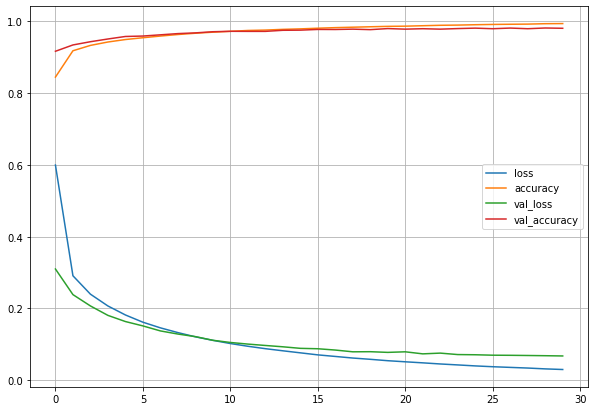

In [57]:
pd.DataFrame(history.history).plot(figsize=(10,7))
plt.grid(True)
plt.show()

In [58]:
model_cf.evaluate(X_test_full, y_test_full)

313/313 [==============================] - 0s 1ms/step - loss: 0.0716 - accuracy: 0.9791


[0.07159402966499329, 0.9790999889373779]

In [59]:
# here steps are 313 as we have batch size =32
X_test_full.shape[0]/32

312.5

In [60]:
model_cf.save("deepL_1.h5")

In [61]:
model_cf.predict(X_test_full[:1]).round(3)

array([[0., 0., 0., 0., 0., 0., 0., 1., 0., 0.]], dtype=float32)

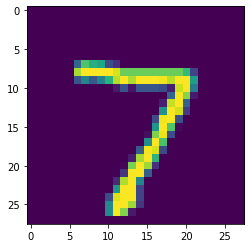

In [62]:
plt.imshow(X_test_full[0])

In [63]:
np.argmax(model_cf.predict(X_test_full[:3]), axis=-1)


array([7, 2, 1], dtype=int64)

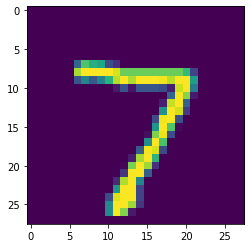

In [64]:
plt.imshow(X_test_full[0])

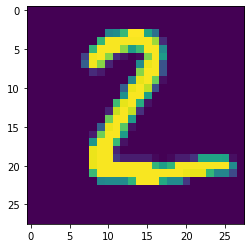

In [65]:
plt.imshow(X_test_full[1])

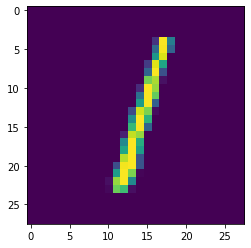

In [66]:
plt.imshow(X_test_full[2])

In [67]:
X_new = X_test_full[:3]

In [68]:
pred = model_cf.predict(X_new)

In [69]:
pred

array([[6.2345686e-07, 5.7373533e-08, 2.5382104e-05, 3.1548995e-04,
        3.8783532e-10, 2.2812921e-07, 1.2174295e-11, 9.9965334e-01,
        2.0618832e-06, 2.8932297e-06],
       [1.7197436e-07, 2.1951544e-06, 9.9998057e-01, 1.0955402e-05,
        2.9043413e-13, 1.2502146e-07, 3.1201073e-06, 2.3519264e-13,
        2.9371893e-06, 9.2005190e-13],
       [2.2888610e-06, 9.9716789e-01, 1.7469590e-04, 3.5276033e-05,
        1.8515675e-04, 1.3028846e-04, 7.4546580e-05, 1.3231327e-03,
        8.7922282e-04, 2.7366546e-05]], dtype=float32)

In [70]:
pred = np.argmax(pred, axis=-1)

In [71]:
actual = y_test_full[:3]

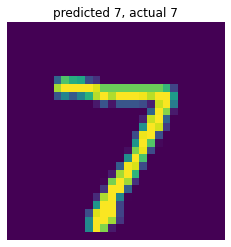

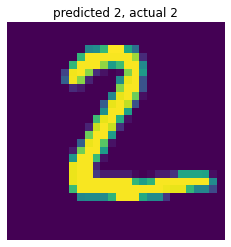

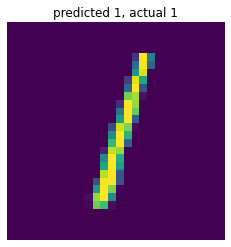

In [72]:
for img, predicted_data, actual_data in zip(X_new, pred, actual):
  plt.imshow(img)
  plt.title(f'predicted {predicted_data}, actual {actual_data}')
  plt.axis("off")
  plt.show()
   